# Installation and Setup

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.11.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [ ]:
# Importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
np.max(x_train), np.min(x_train), np.mean(x_train)

(255, 0, 72.94035223214286)

In [ ]:
np.max(y_train), np.min(y_train), np.mean(y_train)

(9, 0, 4.5)

In [ ]:
class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle Boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle Boot']


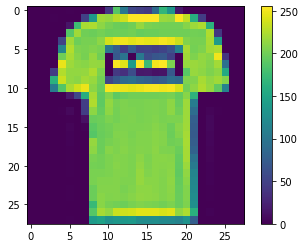

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [ ]:
y_train[1]

0

In [ ]:
#Normalizing Dataset
x_train = x_train/255.0
x_test = x_test/255.0

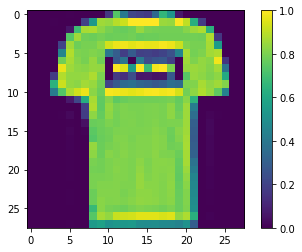

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [ ]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [ ]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

# Building the Model

In [ ]:
model = tf.keras.models.Sequential()


In [ ]:
model.add(tf.keras.layers.Dense(units=128,activation='relu', input_shape=(784,)))

In [ ]:
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

# Training the model

In [ ]:
#Compiling the model
#1) Optimizer
#2) loss function
#3) matrices
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.5530 - sparse_categorical_accuracy: 0.8045
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4189 - sparse_categorical_accuracy: 0.8483
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3823 - sparse_categorical_accuracy: 0.8612
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3629 - sparse_categorical_accuracy: 0.8667
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3471 - sparse_categorical_accuracy: 0.8727
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3352 - sparse_categorical_accuracy: 0.8752
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3283 - sparse_categorical_accuracy: 0.8773
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3172 - sparse_categorical_accuracy: 0.8828
Epoch 9/10
1875/1875 [===

# Model Evaluation and Prediction

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3410 - sparse_categorical_accuracy: 0.8810


In [ ]:
print(test_accuracy)
print(test_loss)

0.8809999823570251
0.34098970890045166


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 4ms/step


In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_pred[0]

9

In [ ]:
y_test[0]

9

In [ ]:
y_pred[110], y_test[110]

(2, 2)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[770   0  21  42   3   0 162   0   2   0]
 [  2 961   2  25   4   0   6   0   0   0]
 [  8   0 791  14 101   0  86   0   0   0]
 [  9   4   9 915  28   0  31   0   4   0]
 [  0   0  90  29 790   0  89   0   2   0]
 [  0   0   0   1   0 953   0  28   3  15]
 [ 89   0  86  36  48   0 735   0   6   0]
 [  0   0   0   0   0  11   0 975   0  14]
 [  3   0   3   4   2   1  10   2 975   0]
 [  0   0   0   0   0   4   1  50   0 945]]


In [ ]:
acc_cm = accuracy_score(y_test,y_pred)

In [ ]:
acc_cm

0.881